In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd

In [24]:
#reading Indian shapely file 
# File is having latitudes and longitudes of various Indian States

data_map = gpd.read_file('E:\\Download\\Igismap\\Indian_States.shp')
print(data_map.head())
print("Attribute list:",data_map.columns)
print("Number of States:",data_map.count())
    
#printing 20th number state 
data_map['st_nm'].iloc[20] 

                      st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...
Attribute list: Index(['st_nm', 'geometry'], dtype='object')
Number of States: st_nm       36
geometry    36
dtype: int64


'Meghalaya'

In [37]:
#Extracting data from Indian govt. site 
url = 'https://www.mohfw.gov.in/'

#Request to extract data from site 
web_content = requests.get(url).content

#applying html parser to parse html content  
soup = BeautifulSoup(web_content, "html.parser")
#print(soup.prettify())
def extract_contents(row):
    return [x.text.replace('\n', '') for x in row]

stats = [] 
all_rows = soup.find_all('tr')   # using tr tag to find all the rows
#print(all_rows)
for row in all_rows:

    stat = extract_contents(row.find_all('td')) 

    if len(stat) == 5:

        stats.append(stat)


In [26]:
#Converting html data into dataframe 

new_cols = ["Sr.No", "States","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States,Confirmed,Recovered,Deceased
0,1,Andaman and Nicobar Islands,33,33,0
1,2,Andhra Pradesh,3110,1896,56
2,3,Arunachal Pradesh,2,1,0
3,4,Assam,526,62,4
4,5,Bihar,2730,749,13


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


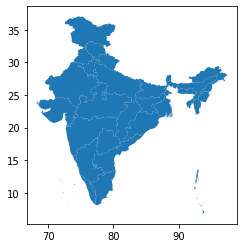

In [12]:
#Correction required to match names in both datasets 

data_map.rename(columns = {'st_nm':'States'}, inplace = True)
data_map['States'] =data_map['States'].str.replace('&','and')
data_map['States'].iloc[0]  = 'Andaman and Nicobar Islands'
data_map['States'].iloc[1] = 'Arunachal Pradesh'
data_map['States'].iloc[6] = 'Dadar Nagar Haveli'
data_map['States'].iloc[23] = 'Delhi'
data_map['States'].iloc[29]='Telengana'
#Plotting map of The India 
data_map.plot()

In [13]:
#Merging both datasets together

merged = pd.merge(data_map, state_data, on = 'States')
merged.drop('Sr.No', axis = 1, inplace = True)
merged.head()

,States,geometry,Confirmed,Recovered,Deceased
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",33,33,0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",2,1,0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",526,62,4
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2730,749,13
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",238,186,3


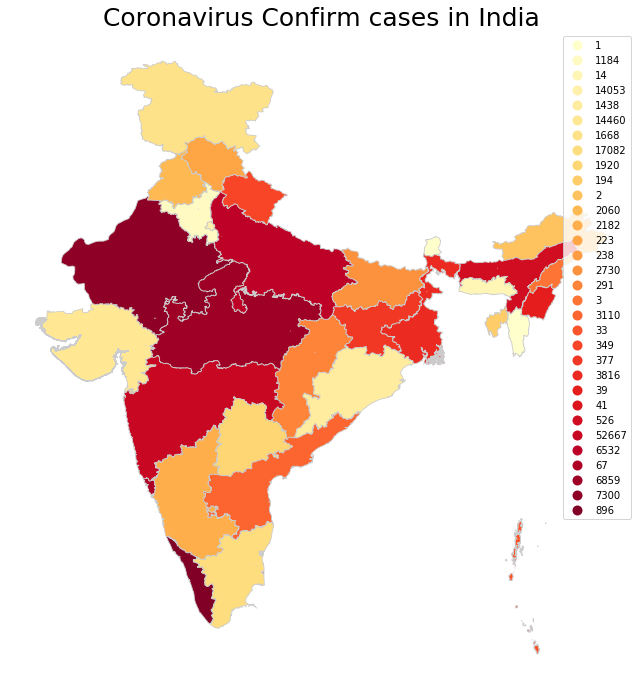

In [16]:
#plotting coronavirus cases on map 

fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')

#Set the title of the map
ax.set_title('Coronavirus Confirm cases in India', fontsize=25)
merged.plot(column = 'Confirmed',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend = True)

#Showing plot of India with coronavirus cases 
plt.show()

# World Map

In [7]:
data_map = gpd.read_file('E:\\Download\\Igismap World\\TM_WORLD_BORDERS-0.3.shp')
print(data_map.head(2))
print("Attribute list:",data_map.columns)
print("Number of Countries:",data_map.count())
    
#printing 20th number state 
#data_map['st_nm'].iloc[20] 

  fips iso2 iso3  un        name  area  pop2005  region  subregion     lon  \
0   AJ   AZ  AZE  31  Azerbaijan  8260  8352021     142        145  47.395   
1   AL   AL  ALB   8     Albania  2740  3153731     150         39  20.068   

      lat                                           geometry  
0  40.430  MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...  
1  41.143  POLYGON ((19.43621 41.02107, 19.45055 41.06000...  
Attribute list: Index(['fips', 'iso2', 'iso3', 'un', 'name', 'area', 'pop2005', 'region',
       'subregion', 'lon', 'lat', 'geometry'],
      dtype='object')
Number of Countries: fips         243
iso2         246
iso3         246
un           246
name         246
area         246
pop2005      246
region       246
subregion    246
lon          246
lat          246
geometry     246
dtype: int64


In [66]:
url="https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/"
web_content=requests.get(url).content
data=pd.read_html(web_content)
data[0]

,Country,Cases,Deaths,Region
0,United States,1753314,102559,North America
1,Brazil,418608,25935,South America
2,Russia,379051,4142,Europe
3,Spain,283849,27118,Europe
4,United Kingdom,269127,37837,Europe
...,...,...,...,...
209,Caribbean Netherlands,6,0,North America
210,Saint Barthelemy,6,0,North America
211,Anguilla,3,0,North America
212,Lesotho,2,0,Africa


In [67]:
col=["Country","Cases","Deaths","Region"]
dfs=pd.DataFrame(data=data[0] , columns=col)
dfs

,Country,Cases,Deaths,Region
0,United States,1753314,102559,North America
1,Brazil,418608,25935,South America
2,Russia,379051,4142,Europe
3,Spain,283849,27118,Europe
4,United Kingdom,269127,37837,Europe
...,...,...,...,...
209,Caribbean Netherlands,6,0,North America
210,Saint Barthelemy,6,0,North America
211,Anguilla,3,0,North America
212,Lesotho,2,0,Africa


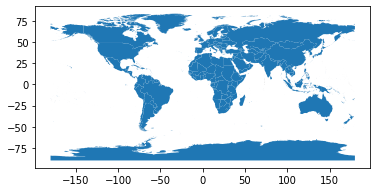

In [68]:
data_map.plot()

In [69]:
data_map.rename(columns={"name":"Country"},inplace=True)

In [95]:
data_map['Country'].replace('United States','USA', inplace = True)

data_map['Country'].replace('United Kingdom','UK', inplace = True)

data_map['Country'].replace('Congo DRC','DRC', inplace = True)

data_map['Country'].replace('Russian Federation','Russia', inplace = True)


merged = pd.merge(data_map,dfs, on = 'Country')
merged.head()

,fips,iso2,iso3,un,Country,area,pop2005,region,subregion,lon,lat,geometry,Cases,Deaths,Region
0,AL,AL,ALB,8,Brazil,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",418608,25935,South America
1,AQ,AS,ASM,16,Russia,20,64051,9,61,-170.730,-14.318,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546...",379051,4142,Europe
2,AD,DZ,DZA,12,Spain,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",283849,27118,Europe
3,AR,AR,ARG,32,Italy,273669,38747148,19,5,-65.167,-35.377,"MULTIPOLYGON (((-68.60861 -54.89140, -68.62056...",231732,33142,Europe
4,AS,AU,AUS,36,France,768230,20310208,9,53,136.189,-24.973,"MULTIPOLYGON (((158.88217 -54.71139, 158.87967...",182913,28596,Europe


In [96]:
merged.drop(["fips","iso2","iso3","un","area","region","subregion","lon","lat"],axis=1,inplace=True)


In [97]:
print( merged.head())
print(type(merged))

  Country   pop2005                                           geometry  \
0  Brazil   3153731  POLYGON ((19.43621 41.02107, 19.45055 41.06000...   
1  Russia     64051  MULTIPOLYGON (((-170.54251 -14.29750, -170.546...   
2   Spain  32854159  POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...   
3   Italy  38747148  MULTIPOLYGON (((-68.60861 -54.89140, -68.62056...   
4  France  20310208  MULTIPOLYGON (((158.88217 -54.71139, 158.87967...   

    Cases  Deaths         Region  
0  418608   25935  South America  
1  379051    4142         Europe  
2  283849   27118         Europe  
3  231732   33142         Europe  
4  182913   28596         Europe  
<class 'geopandas.geodataframe.GeoDataFrame'>


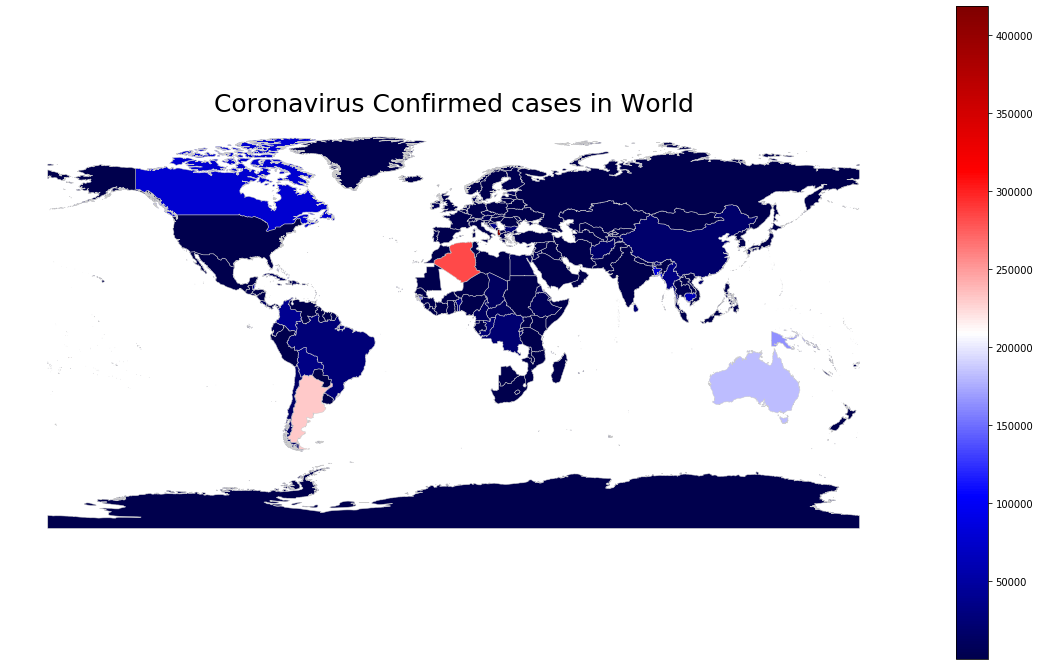

In [153]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
#Set the title of the map
ax.set_title('Coronavirus Confirmed cases in World', fontsize=25)
merged.plot(column='Cases',cmap="seismic", linewidth=0.5, ax=ax, edgecolor='0.8', legend = True)
plt.show()